In [1]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [2]:
def custom_sent_tokenize(text):
    sentences = []
    paragraphs = [p for p in text.split('\n') if p]
    for paragraph in paragraphs:
        paragraph = paragraph + '\n'
        sentences.extend(sent_tokenize(paragraph))
        
    return sentences

In [11]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize

TRAINING_DIR = '../data/training'
VALIDATION_DIR = '../data/validation'

dirs = [TRAINING_DIR, VALIDATION_DIR]
dfs = {}

for dir in dirs:
    X, y, positions, file_names = get_data(
        dir)
    name = dir.split('/')[-1]
    dfs[name] = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})
    dfs[name]['num_sent'] = [len(sent_tokenize(d)) for d in dfs[name].text]
    dfs[name]['num_sent_custom'] = [len(custom_sent_tokenize(d)) for d in dfs[name].text]
    dfs[name]['num_splits'] = [len(x) for x in dfs[name].pos]
    dfs[name]['num_words'] = [len(word_tokenize(x)) for x in dfs[name].text]
    dfs[name]['num_parag'] = [x.count('\n') for x in dfs[name].text]
    dfs[name]['num_char'] = [len(x) for x in dfs[name].text]

In [4]:
for key, df in dfs.items():
    print(key, df.text.shape)

training (2980,)
validation (1492,)


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


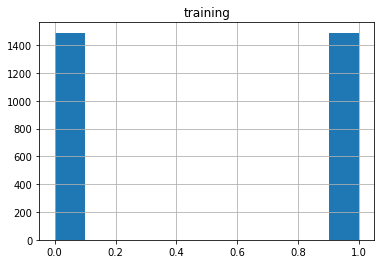

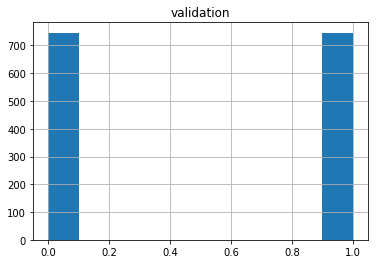

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

for key, df in dfs.items():
    plt.figure()    
    plt.title(key)
    print(df.label.hist())

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


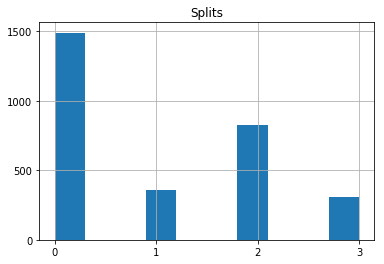

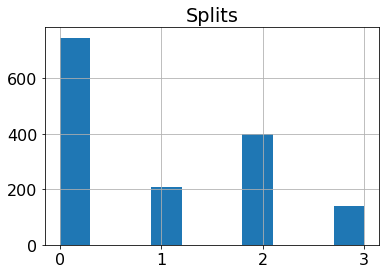

In [6]:
for key, df in dfs.items():
    plt.figure()   
    plt.title('Splits') 
    plt.rcParams.update({'font.size': 16})
    print(df.num_splits.hist())

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


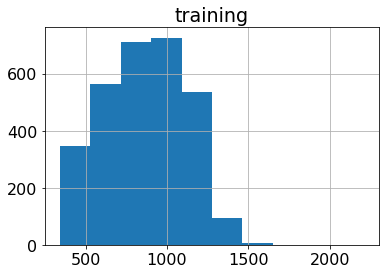

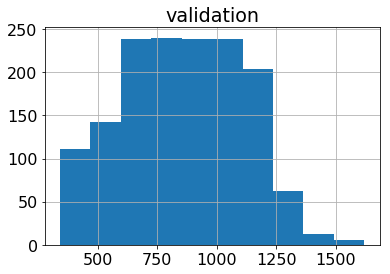

In [10]:
for key, df in dfs.items():
    plt.figure()   
    plt.title(key) 
    plt.rcParams.update({'font.size': 16})
    print(df.num_words.hist())

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


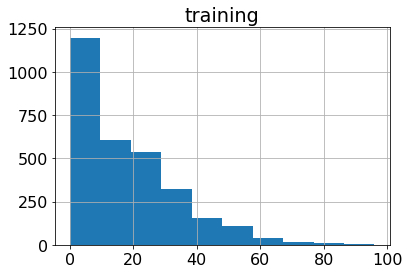

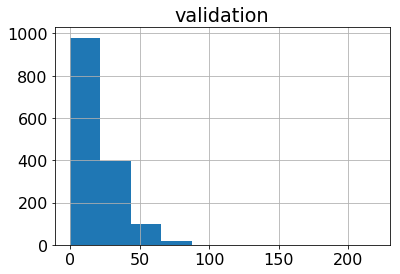

In [7]:
for key, df in dfs.items():
    plt.figure()    
    plt.title(key)
    print(df.num_parag.hist())

In [12]:
for key, df in dfs.items():
    print(key)
    print(df.num_char.describe())
    print('---------')

training
count     2980.000000
mean      4329.197987
std       1277.725651
min       1525.000000
25%       3345.750000
50%       4356.500000
75%       5319.000000
max      11619.000000
Name: num_char, dtype: float64
---------
validation
count     1492.000000
mean      4305.894102
std       1299.999489
min       1544.000000
25%       3360.500000
50%       4310.500000
75%       5327.250000
max      11396.000000
Name: num_char, dtype: float64
---------


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


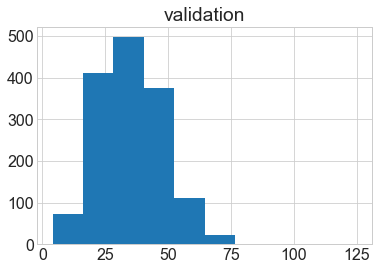

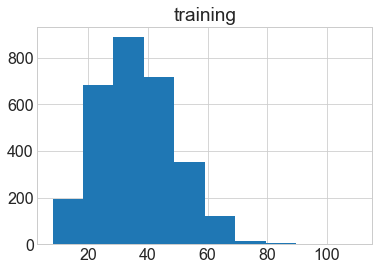

In [35]:
for key, df in dfs.items():
    plt.figure()    
    plt.title(key)
    print(df.num_sent.hist())

In [37]:
sents = sent_tokenize(dfs['training'].text[0])
for s in sents[:5]:
    print(s)
    print('---------------')

Definitely remind anyone looking at your forecast that it is an estimate Quickly check out how variable your velocity is.
---------------
What is the team's last 3 iteration velocity?
---------------
Current iteration?
---------------
Total project duration?
---------------
A highly variable velocity should prompt you to lower your confidence in any long-term forecasting results.
---------------


In [38]:
for key, df in dfs.items():
    print(key)
    print(df.num_sent.describe())
    print('---------')

validation
count    1492.000000
mean       35.450402
std        12.676741
min         4.000000
25%        26.000000
50%        35.000000
75%        44.000000
max       125.000000
Name: num_sent, dtype: float64
---------
training
count    2980.000000
mean       36.264094
std        12.550845
min         8.000000
25%        27.000000
50%        35.000000
75%        44.250000
max       110.000000
Name: num_sent, dtype: float64
---------


In [39]:
for key, df in dfs.items():
    print(key)
    print(df.num_sent_custom.describe())
    print('---------')

validation
count    1492.000000
mean       37.548928
std        13.898777
min         9.000000
25%        27.000000
50%        37.000000
75%        46.000000
max       216.000000
Name: num_sent_custom, dtype: float64
---------
training
count    2980.000000
mean       38.189262
std        13.132517
min         8.000000
25%        28.000000
50%        37.000000
75%        47.000000
max       113.000000
Name: num_sent_custom, dtype: float64
---------


In [11]:
for key, df in dfs.items():
    print(key)
    print(df.num_words.describe())
    print('---------')

training
count    2980.000000
mean      863.296644
std       251.412524
min       341.000000
25%       673.000000
50%       869.500000
75%      1065.250000
max      2212.000000
Name: num_words, dtype: float64
---------
validation
count    1492.000000
mean      856.956434
std       251.452905
min       341.000000
25%       668.750000
50%       863.000000
75%      1054.000000
max      1619.000000
Name: num_words, dtype: float64
---------


Text(0.5,0,'')

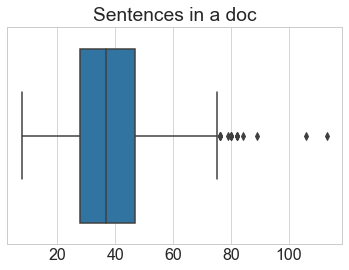

In [40]:
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
#plt.xticks(np.arange(0, 150, 5.0))
plt.title('Sentences in a doc')
ax = sns.boxplot(x=dfs['training'].num_sent_custom)
plt.rcParams.update({'font.size': 16})
ax.set_xlabel('')

In [16]:
df = dfs['training']

In [17]:
df_splits = []
df_true = df[df.label==True]
df_true.head()

,filename,label,pos,text,num_sent,num_sent_custom,num_splits,num_words,num_parag,num_char
0,problem-1410,True,"[1683, 2890]",Make up some more tasks and add them to the qu...,32,41,2,770,48,3808
6,problem-745,True,"[1204, 3220]",There's some scientific misconceptions here: \...,51,55,2,930,26,4497
7,problem-2307,True,[1448],The battle of Thermopylae (300 Spartans) is a ...,57,57,1,1009,0,5082
8,problem-800,True,[1426],Anas was a young man when the Messenger of All...,18,20,1,550,8,2769
9,problem-1486,True,"[1574, 2470, 4046]","If my child were closer 18, maybe as young as ...",68,71,3,1050,26,5162


In [18]:
for index, row in df_true.iterrows():
    for i, pos in enumerate(row['pos']):
        last=0
        if i!=0:
            last = row['pos'][i-1]            
        
        df_splits.append(row['text'][last:pos])
        
    df_splits.append(row['text'][row['pos'][-1]:])

In [19]:
len(df_splits)

4416

In [23]:
np.std([len(word_tokenize(x)) for x in df_splits])

133.8484068830026

In [45]:
split_sents = [len(custom_sent_tokenize(s)) for s in df_splits]

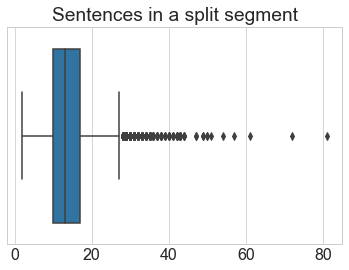

In [46]:
sns.set_style("whitegrid")
#plt.xticks(np.arange(0, 150, 5.0))
plt.rcParams.update({'font.size': 16})
plt.title('Sentences in a split segment')
sns.boxplot(x=split_sents)

In [47]:
max(split_sents)

81

In [48]:
min(split_sents)

2

In [49]:
np.mean(split_sents)

14.325634057971014

In [50]:
np.median(split_sents)

13.0

In [78]:
np.percentile(split_sents, 0.1)

3.0

In [56]:
min_sent = [s for s in df_splits if len(custom_sent_tokenize(s)) < 4]

In [57]:
len(min_sent)

8

In [58]:
for segm in min_sent:
    sents = custom_sent_tokenize(segm)
    print(len(sents))
    for s in sents:
        print(s)
        print('-----------------------------')
    print('$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$')

3
This is something that both Sanders and Jackson shared, both were very good at both sports to the extent that teams were willing to let them do both even though they had to sacrifice a roster spot to a player who would not be there 100% of the time.
-----------------------------
It's a long road to get from the draft to the major leagues, excellent players often shortcut one or many levels of their team's farm system, but most players play for at least part of one season in the minor leagues (the last player to go straight to the bigs from the draft was Mike Leake in Cincinnati a couple of years ago) Second, a Perfecto requires that the pitcher retire every batter in the game.
-----------------------------
That means if the game goes 10 or longer, he must stay in the game in order to get credit for it being a perfect game.
-----------------------------
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
3
The other is The Conscious Mind by David Chalmers, who explains forcefully the problem and argues f

In [66]:
three_splits = df[df.num_splits==3]
three_splits.num_sent.describe()

count    306.000000
mean      47.055556
std        9.601580
min       22.000000
25%       40.000000
50%       46.000000
75%       53.000000
max       73.000000
Name: num_sent, dtype: float64

In [11]:
df.head()

,filename,label,pos,text,num_sent,num_sent_custom,num_splits,chars
0,problem-1,True,"[1204, 4225, 5431]",Definitely remind anyone looking at your forec...,68,70,3,6375
1,problem-10,True,"[1198, 4386]",Assuming you'd like to be Scrum Guide complian...,47,50,2,5386
2,problem-100,False,[],It's all about finding the right balance. I'd ...,32,32,0,3748
3,problem-1000,True,"[909, 3045, 4196]",The inbox also suffers from being an unrecogni...,47,47,3,5171
4,problem-1001,True,"[2197, 3464]","Second verse, same as the first? It still lack...",60,60,2,5808


In [10]:
df['chars'] = [len(x) for x in df.text]

In [25]:
df = dfs['validation']

Text(0,0.5,'Sentences')

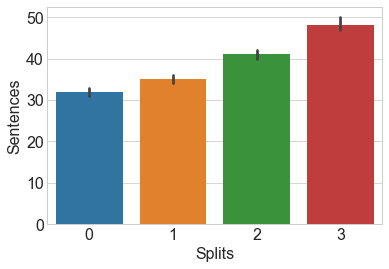

In [27]:
import seaborn as sns
from numpy import median, mean
plt.rcParams.update({'font.size': 16})
ax = sns.barplot(x="num_splits", y="num_sent_custom", data=dfs['training'], estimator=median)
ax.set_xlabel('Splits')
ax.set_ylabel('Sentences')

Text(0,0.5,'Sentences')

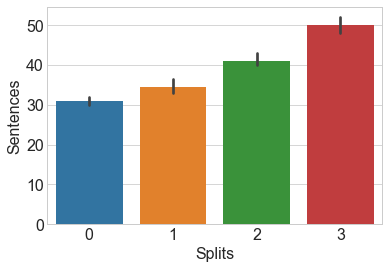

In [28]:
plt.rcParams.update({'font.size': 16})
ax = sns.barplot(x="num_splits", y="num_sent_custom", data=dfs['validation'], estimator=median)
ax.set_xlabel('Splits')
ax.set_ylabel('Sentences')

In [59]:
doc_sent = [custom_sent_tokenize(d) for d in df.text]

In [61]:
from itertools import chain
from nltk.tokenize import sent_tokenize, word_tokenize

sentences = list(chain.from_iterable(doc_sent))
words = [len(word_tokenize(s)) for s in sentences]

In [62]:
df_sent = pd.DataFrame(data={'text': sentences, 'num_words': words})
df_sent.head()

,num_words,text
0,21,Definitely remind anyone looking at your forec...
1,10,What is the team's last 3 iteration velocity?
2,3,Current iteration?
3,4,Total project duration?
4,17,A highly variable velocity should prompt you t...


In [63]:
df_sent.num_words.describe()

count    113804.000000
mean         22.607123
std          14.301828
min           1.000000
25%          13.000000
50%          20.000000
75%          29.000000
max         233.000000
Name: num_words, dtype: float64

In [79]:
np.percentile(df_sent['num_words'], 99)

71.0

In [87]:
max_words = df_sent[df_sent['num_words'] > 100]

In [88]:
len(max_words)

201

In [89]:
for text in max_words.text:
    print(text)
    print('-------------------')

Unofficial extended version (over character limit) On the eleventh day of WinterBash Stack Overflow sent to me Eleven Chuck Yeagers, Ten Bounty Hunters, Nine Sock Puppets, Eight Lonesome Cowboys, Seven Frosties the Snowman, Six RoboCops, Five Defenders of the Realm, Four Archeologists, Johnny Three-Hats, Two Marauders, Tim Post's head and R-E-S-P-E-C-T for hitting the rep cap On the third day of WinterBash Stack Overflow sent to me Johnny Three-Hats, Two Marauders, Tim Post's head and R-E-S-P-E-C-T for hitting the rep cap On the ninth day of WinterBash Stack Overflow sent to me Nine Sock Puppets, Eight Lonesome Cowboys, Seven Frosties the Snowman, Six RoboCops, Five Defenders of the Realm, Four Archeologists, Johnny Three-Hats, Two Marauders, Tim Post's head and R-E-S-P-E-C-T for hitting the rep cap Should diamond moderators spend time in review?
-------------------
The relevant information is on p. 85 of the 2015/16 FIFA Laws of the Game: No it's a technical offence, a bit like persis